In [2]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
df = pd.read_csv('USCensus1990-2000rows.data.txt')
df

,caseid,dAge,dAncstry1,dAncstry2,iAvail,iCitizen,iClass,dDepart,iDisabl1,iDisabl2,...,iTmpabsnt,dTravtime,iVietnam,dWeek89,iWork89,iWorklwk,iWWII,iYearsch,iYearwrk,dYrsserv
0,10000,5,0,1,0,0,5,3,2,2,...,0,5,0,2,1,1,0,11,1,0
1,10001,6,1,1,0,0,7,5,2,2,...,0,1,0,2,1,1,0,5,1,0
2,10002,3,1,2,0,0,7,4,2,2,...,0,2,0,2,1,1,0,10,1,0
3,10003,4,1,2,0,0,1,3,2,2,...,0,1,0,1,1,1,0,10,1,0
4,10004,7,1,1,0,0,0,0,2,2,...,3,0,0,0,2,2,0,5,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,11994,7,1,1,0,3,0,0,2,2,...,3,0,0,0,2,2,0,4,5,0
1995,11995,4,1,1,0,0,1,3,2,2,...,0,5,0,2,1,1,0,15,1,0
1996,11996,4,1,1,0,0,2,3,2,2,...,0,5,0,2,1,1,0,11,1,0
1997,11997,2,2,1,0,4,0,0,0,0,...,0,0,0,0,0,0,0,5,0,0


In [9]:
df.describe()

,caseid,dAge,dAncstry1,dAncstry2,iAvail,iCitizen,iClass,dDepart,iDisabl1,iDisabl2,...,iTmpabsnt,dTravtime,iVietnam,dWeek89,iWork89,iWorklwk,iWWII,iYearsch,iYearwrk,dYrsserv
count,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,...,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000
mean,10999.000000,3.838419,3.261631,1.607304,0.120560,0.283642,1.242121,1.311656,1.423212,1.456728,...,0.833917,1.419710,0.032016,0.800900,1.004502,1.116058,0.038019,8.310655,1.860930,0.143072
std,577.205914,2.059769,4.014000,1.765923,0.668895,0.962296,1.801569,1.719993,0.850120,0.852485,...,1.324834,1.952753,0.176087,0.852705,0.694955,0.753063,0.191290,4.086654,2.161328,0.414382
min,10000.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10499.500000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,5.000000,1.000000,0.000000
50%,10999.000000,4.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,10.000000,1.000000,0.000000
75%,11498.500000,6.000000,3.000000,2.000000,0.000000,0.000000,1.000000,3.000000,2.000000,2.000000,...,3.000000,3.000000,0.000000,2.000000,1.000000,2.000000,0.000000,11.000000,2.000000,0.000000
max,11998.000000,7.000000,11.000000,12.000000,4.000000,4.000000,9.000000,5.000000,2.000000,2.000000,...,3.000000,6.000000,1.000000,2.000000,2.000000,2.000000,1.000000,17.000000,7.000000,2.000000


In [14]:
df.columns

Index(['caseid', 'dAge', 'dAncstry1', 'dAncstry2', 'iAvail', 'iCitizen',
       'iClass', 'dDepart', 'iDisabl1', 'iDisabl2', 'iEnglish', 'iFeb55',
       'iFertil', 'dHispanic', 'dHour89', 'dHours', 'iImmigr', 'dIncome1',
       'dIncome2', 'dIncome3', 'dIncome4', 'dIncome5', 'dIncome6', 'dIncome7',
       'dIncome8', 'dIndustry', 'iKorean', 'iLang1', 'iLooking', 'iMarital',
       'iMay75880', 'iMeans', 'iMilitary', 'iMobility', 'iMobillim', 'dOccup',
       'iOthrserv', 'iPerscare', 'dPOB', 'dPoverty', 'dPwgt1', 'iRagechld',
       'dRearning', 'iRelat1', 'iRelat2', 'iRemplpar', 'iRiders', 'iRlabor',
       'iRownchld', 'dRpincome', 'iRPOB', 'iRrelchld', 'iRspouse', 'iRvetserv',
       'iSchool', 'iSept80', 'iSex', 'iSubfam1', 'iSubfam2', 'iTmpabsnt',
       'dTravtime', 'iVietnam', 'dWeek89', 'iWork89', 'iWorklwk', 'iWWII',
       'iYearsch', 'iYearwrk', 'dYrsserv'],
      dtype='object')

In [3]:
Z = linkage(df, 'ward')

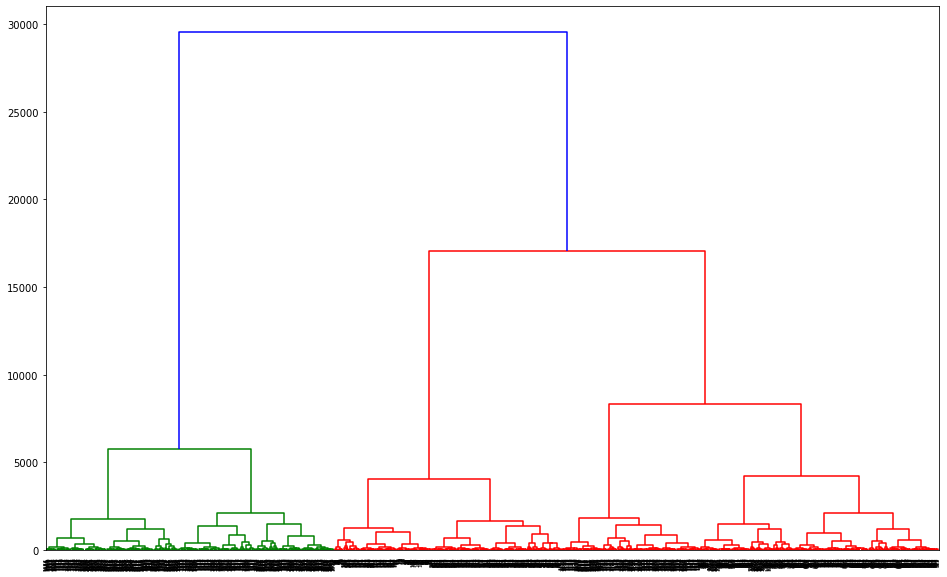

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,10))
dendrogram(Z)
plt.show()

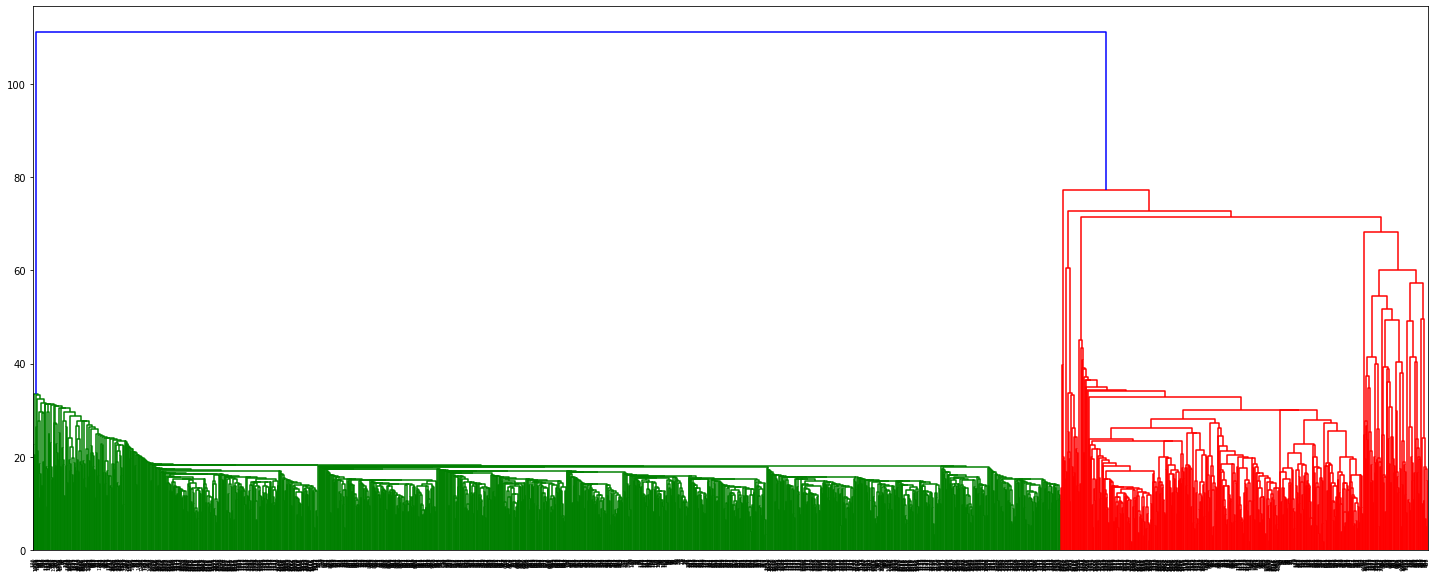

In [13]:
A = linkage(df, 'single')
plt.figure(figsize=(25, 10))

dendrogram(A)
plt.show()